# Problem loan prediction 2017 - Lending Club
## Testing model with 2007-2015 Data from Kaggle

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np
import matplotlib.pyplot as pl
import datetime
%matplotlib inline
l_encoder = LabelEncoder()

## Uploading and cleaning the data

In [2]:
# Uploading data from 2016
data_old = pd.read_csv('data_files/loan.csv', low_memory=False)

In [3]:
print (data_old.shape)
print('HEAD')
display(data_old.head())
print('\n TAIL')
display(data_old.tail())

(887379, 74)
HEAD


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



 TAIL


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN
887378,36271262,38982659,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,41700.0,NaN,NaN,NaN


There are a few data descriptors at the end of the files than need to be remove. 

In [4]:
data_old = data_old.sort_values(by = 'id',na_position = 'first', ascending=True)
display(data_old.tail(10))

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466812,68616588,73519410,15000.0,15000.0,15000.0,36 months,7.91,469.43,A,A5,...,14796.0,44.3,0.0,0.0,9747.0,47.4,18500.0,4.0,0.0,2.0
466709,68616757,73519581,10000.0,10000.0,10000.0,36 months,6.99,308.73,A,A3,...,23084.0,55.3,0.0,1.0,2882.0,47.6,21600.0,0.0,0.0,1.0
466532,68616825,73519650,20000.0,20000.0,20000.0,36 months,9.17,637.58,B,B2,...,25470.0,77.8,1.0,6.0,3043.0,56.9,33400.0,6.0,0.0,5.0
466547,68616851,73519677,12500.0,12500.0,12500.0,36 months,7.49,388.78,A,A4,...,0.0,NaN,0.0,0.0,6158.0,80.7,12400.0,0.0,0.0,0.0
466492,68616867,73519693,16000.0,16000.0,16000.0,60 months,14.85,379.39,C,C5,...,52879.0,81.5,0.0,1.0,2401.0,81.8,13300.0,0.0,5.0,0.0
466303,68616873,73519699,8000.0,8000.0,8000.0,36 months,11.48,263.74,B,B5,...,106748.0,72.2,0.0,2.0,4725.0,48.8,18000.0,0.0,0.0,1.0
466462,68616891,73519717,24000.0,24000.0,24000.0,36 months,11.48,791.20,B,B5,...,0.0,NaN,0.0,0.0,8641.0,86.5,26400.0,0.0,0.0,0.0
466454,68616919,73519746,15000.0,15000.0,15000.0,36 months,5.32,451.73,A,A1,...,11138.0,44.6,2.0,3.0,6299.0,22.6,78800.0,0.0,2.0,0.0
466388,68617034,73519870,14650.0,14650.0,14650.0,60 months,20.50,392.23,E,E4,...,51435.0,91.0,0.0,0.0,10159.0,92.7,11200.0,0.0,0.0,0.0
466305,68617057,73519894,15000.0,15000.0,15000.0,60 months,10.78,324.50,B,B4,...,71557.0,80.6,1.0,2.0,8415.0,75.6,35400.0,0.0,1.0,1.0


In [5]:
print ('The data frame has %d rows (loans) with %d columns' % (data_old.shape[0], data_old.shape[1]))
data_old.drop(data_old.tail(5).index,inplace=True)
display(data_old.tail(5))

The data frame has 887379 rows (loans) with 74 columns


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466812,68616588,73519410,15000.0,15000.0,15000.0,36 months,7.91,469.43,A,A5,...,14796.0,44.3,0.0,0.0,9747.0,47.4,18500.0,4.0,0.0,2.0
466709,68616757,73519581,10000.0,10000.0,10000.0,36 months,6.99,308.73,A,A3,...,23084.0,55.3,0.0,1.0,2882.0,47.6,21600.0,0.0,0.0,1.0
466532,68616825,73519650,20000.0,20000.0,20000.0,36 months,9.17,637.58,B,B2,...,25470.0,77.8,1.0,6.0,3043.0,56.9,33400.0,6.0,0.0,5.0
466547,68616851,73519677,12500.0,12500.0,12500.0,36 months,7.49,388.78,A,A4,...,0.0,NaN,0.0,0.0,6158.0,80.7,12400.0,0.0,0.0,0.0
466492,68616867,73519693,16000.0,16000.0,16000.0,60 months,14.85,379.39,C,C5,...,52879.0,81.5,0.0,1.0,2401.0,81.8,13300.0,0.0,5.0,0.0


Remove the columns with only NaN and or with large number of NaN

In [6]:
pd.DataFrame(data_old.isnull().sum().sort_values()[data_old.isnull().sum().sort_values()<10])

,0
id,0
addr_state,0
dti,0
revol_bal,0
initial_list_status,0
out_prncp_inv,0
total_pymnt,0
total_pymnt_inv,0
total_rec_prncp,0
total_rec_int,0


In [7]:
data_old = data_old.dropna(axis=1, how='all')
data_old.shape

(887374, 74)

In [8]:
def df_col_low_nan(df_data, min_nan): 
    # Returns a df with columns with less nan than min_nan
    use_col = pd.DataFrame(df_data.isnull().sum().sort_values()[df_data.isnull().sum().sort_values()<min_nan])
    use_col.reset_index(drop = False, inplace=True)
    use_col.columns = (['col_name','num_NaN'])
    new_data = pd.DataFrame()
    for i in range(0,len(use_col.col_name)):
        df = df_data[use_col.col_name[i]]
        new_data = pd.concat([new_data, df], axis=1)
    return new_data


In [9]:
data_old = df_col_low_nan(data_old, 10)
data_old.shape

(887374, 36)

In [10]:
n_loan_df = pd.read_csv('data_files/loans_2017_clean.csv')
print(len(n_loan_df.columns))
n_loan_df.columns

28


Index(['loan_amnt', 'hardship_flag', 'revol_bal', 'out_prncp', 'total_pymnt',
       'disbursement_method', 'total_pymnt_inv', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
       'application_type', 'total_rec_int', 'addr_state', 'total_rec_prncp',
       'verification_status', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'purpose', 'issue_d', 'loan_status', 'pymnt_plan',
       'debt_settlement_flag', 'annual_inc', 'last_credit_pull_d'],
      dtype='object')

In [22]:
l_error = list(n_loan_df.columns)
l_error.remove('last_credit_pull_d')
l_error.remove('hardship_flag')
l_error.remove('disbursement_method') 
l_error.remove('debt_settlement_flag')# remove column names that might give you error here
l_error

['loan_amnt',
 'revol_bal',
 'out_prncp',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'application_type',
 'total_rec_int',
 'addr_state',
 'total_rec_prncp',
 'verification_status',
 'term',
 'int_rate',
 'grade',
 'emp_length',
 'home_ownership',
 'purpose',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'annual_inc']

In [23]:
new_df = pd.DataFrame()
for i in range(0,len(l_error)):
    col = l_error[i]
    df = data_old[col]
    new_df = pd.concat([new_df, df], axis=1)
print(new_df.shape)
n_loan_df = new_df

(887374, 24)


## Cleaning target feature (loan_status)

In [24]:
n_loan_df = new_df

In [25]:
n_loan_df.loan_status.unique()

array(['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Current',
       'Charged Off', 'Issued', 'In Grace Period', 'Late (31-120 days)',
       'Default', 'Late (16-30 days)'], dtype=object)

In [26]:
# Collapsing all but Fully Paid into Problem Loan
n_loan_df.loan_status = n_loan_df.loan_status.str.replace(r'(^.*Paid$)', 'Fully Paid')
n_loan_df.loan_status = n_loan_df.loan_status.str.replace(r'(^.*Charged Off$)', 'Charged Off')
n_loan_df.loan_status = n_loan_df.loan_status.str.replace(r'(^Late.*$)', 'Late')
n_loan_df.loan_status = n_loan_df.loan_status.str.replace(r'(Late)|(Charged Off)|(In Grace Period)|(Default)', 
                                                          'Problem Loan')
n_loan_df.loan_status.unique()


array(['Fully Paid', 'Problem Loan', 'Current', 'Issued'], dtype=object)

In [28]:
# Removing fully paid loans
n_loan_df = n_loan_df[n_loan_df.loan_status.str.contains('Current')==False]
n_loan_df = n_loan_df[n_loan_df.loan_status.str.contains('Issued')==False]

n_loan_df.loan_status.unique()


array(['Fully Paid', 'Problem Loan'], dtype=object)

## Feature cleaning and selection

In [29]:
# Custom functiones needed later
def types_of_columns(df):
    # creates two separate dataframes 
    # one with float column names and the other with object column names
    non_num_cols = df.dtypes[df.dtypes == 'object']
    float_cols   = df.dtypes[df.dtypes != 'object']
    return non_num_cols, float_cols

def column_checker (df1, df2, num):
    # df1 dataframe whit the columns
    # df2 dataframe with colum names
    for col in range(0,len(df2)):
        col = df2.index[col]
        values = df1[col].unique()
        if len(values) > num:
           print('\n', col, '\n',len(values),'\n',values)

Sorting the columns by type

In [30]:
col_types_original = types_of_columns(n_loan_df)

### Non-Numeric Features

In [31]:
nn_col_list = col_types_original[1]
nn_col_list

loan_amnt                  float64
revol_bal                  float64
out_prncp                  float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_late_fee         float64
recoveries                 float64
collection_recovery_fee    float64
last_pymnt_amnt            float64
total_rec_int              float64
total_rec_prncp            float64
int_rate                   float64
annual_inc                 float64
dtype: object

In [32]:
column_checker(n_loan_df, types_of_columns(n_loan_df)[0], 0)


 application_type 
 2 
 ['INDIVIDUAL' 'JOINT']

 addr_state 
 51 
 ['CA' 'IL' 'NY' 'TX' 'CT' 'RI' 'MD' 'MA' 'SC' 'OH' 'MI' 'MO' 'KY' 'MS' 'KS'
 'DC' 'GA' 'NC' 'NJ' 'WA' 'FL' 'ID' 'AZ' 'LA' 'CO' 'WI' 'WY' 'IN' 'VA' 'ME'
 'NE' 'NH' 'VT' 'UT' 'NM' 'MT' 'AL' 'AR' 'TN' 'SD' 'DE' 'NV' 'OR' 'MN' 'HI'
 'PA' 'IA' 'AK' 'OK' 'WV' 'ND']

 verification_status 
 3 
 ['Verified' 'Not Verified' 'Source Verified']

 term 
 2 
 [' 36 months' ' 60 months']

 grade 
 7 
 ['B' 'F' 'D' 'C' 'A' 'E' 'G']

 emp_length 
 12 
 ['< 1 year' '10+ years' '1 year' '6 years' '9 years' '3 years' '5 years'
 '7 years' '8 years' '2 years' '4 years' 'n/a']

 home_ownership 
 6 
 ['RENT' 'MORTGAGE' 'OWN' 'NONE' 'OTHER' 'ANY']

 purpose 
 14 
 ['debt_consolidation' 'credit_card' 'educational' 'car' 'home_improvement'
 'other' 'small_business' 'major_purchase' 'moving' 'medical' 'house'
 'vacation' 'wedding' 'renewable_energy']

 issue_d 
 103 
 ['Aug-2009' 'Jul-2008' 'May-2008' 'Apr-2008' 'Aug-2014' 'Mar-2010'
 'Nov-2009' '

#### Dropping columns with repetitive or non-relevant information

zip_code and addr_state have similar information - keeping addr_state

grade and sub_grade also have similar information - keeping grade

Converting dates and other numbers into actual numeric variables

In [33]:
# emp_length
# Removing 2110 rows with n/a in emp_length
n_loan_df = n_loan_df[n_loan_df.emp_length.str.contains('n/a')==False]
# less than one year is now 0
n_loan_df.emp_length = n_loan_df.emp_length.str.replace(r'( years)|( year)|(\+ years)', "").str.replace('< 1','0').astype(float)

# Dates
# issue_d is now delta time since issued
n_loan_df.issue_d = ((max(pd.to_datetime(n_loan_df['issue_d'])) - pd.to_datetime(n_loan_df['issue_d'])).dt.days/365).astype(int)

In [34]:
column_checker(n_loan_df, types_of_columns(n_loan_df)[0], 0)


 application_type 
 2 
 ['INDIVIDUAL' 'JOINT']

 addr_state 
 51 
 ['CA' 'IL' 'NY' 'TX' 'CT' 'RI' 'MD' 'MA' 'SC' 'OH' 'MI' 'MO' 'KY' 'MS' 'KS'
 'DC' 'GA' 'NC' 'NJ' 'WA' 'FL' 'ID' 'AZ' 'LA' 'CO' 'WI' 'WY' 'IN' 'VA' 'ME'
 'NE' 'NH' 'VT' 'UT' 'NM' 'MT' 'AL' 'AR' 'TN' 'SD' 'DE' 'NV' 'OR' 'MN' 'HI'
 'PA' 'IA' 'AK' 'OK' 'WV' 'ND']

 verification_status 
 3 
 ['Verified' 'Not Verified' 'Source Verified']

 term 
 2 
 [' 36 months' ' 60 months']

 grade 
 7 
 ['B' 'F' 'D' 'C' 'A' 'E' 'G']

 home_ownership 
 6 
 ['RENT' 'MORTGAGE' 'OWN' 'NONE' 'OTHER' 'ANY']

 purpose 
 14 
 ['debt_consolidation' 'credit_card' 'educational' 'car' 'home_improvement'
 'other' 'small_business' 'major_purchase' 'moving' 'medical' 'house'
 'vacation' 'wedding' 'renewable_energy']

 loan_status 
 2 
 ['Fully Paid' 'Problem Loan']

 pymnt_plan 
 2 
 ['n' 'y']


In [35]:
#n_loan_df = pd.read_csv('loans_2017.csv')
n_loan_df.shape

(266039, 24)

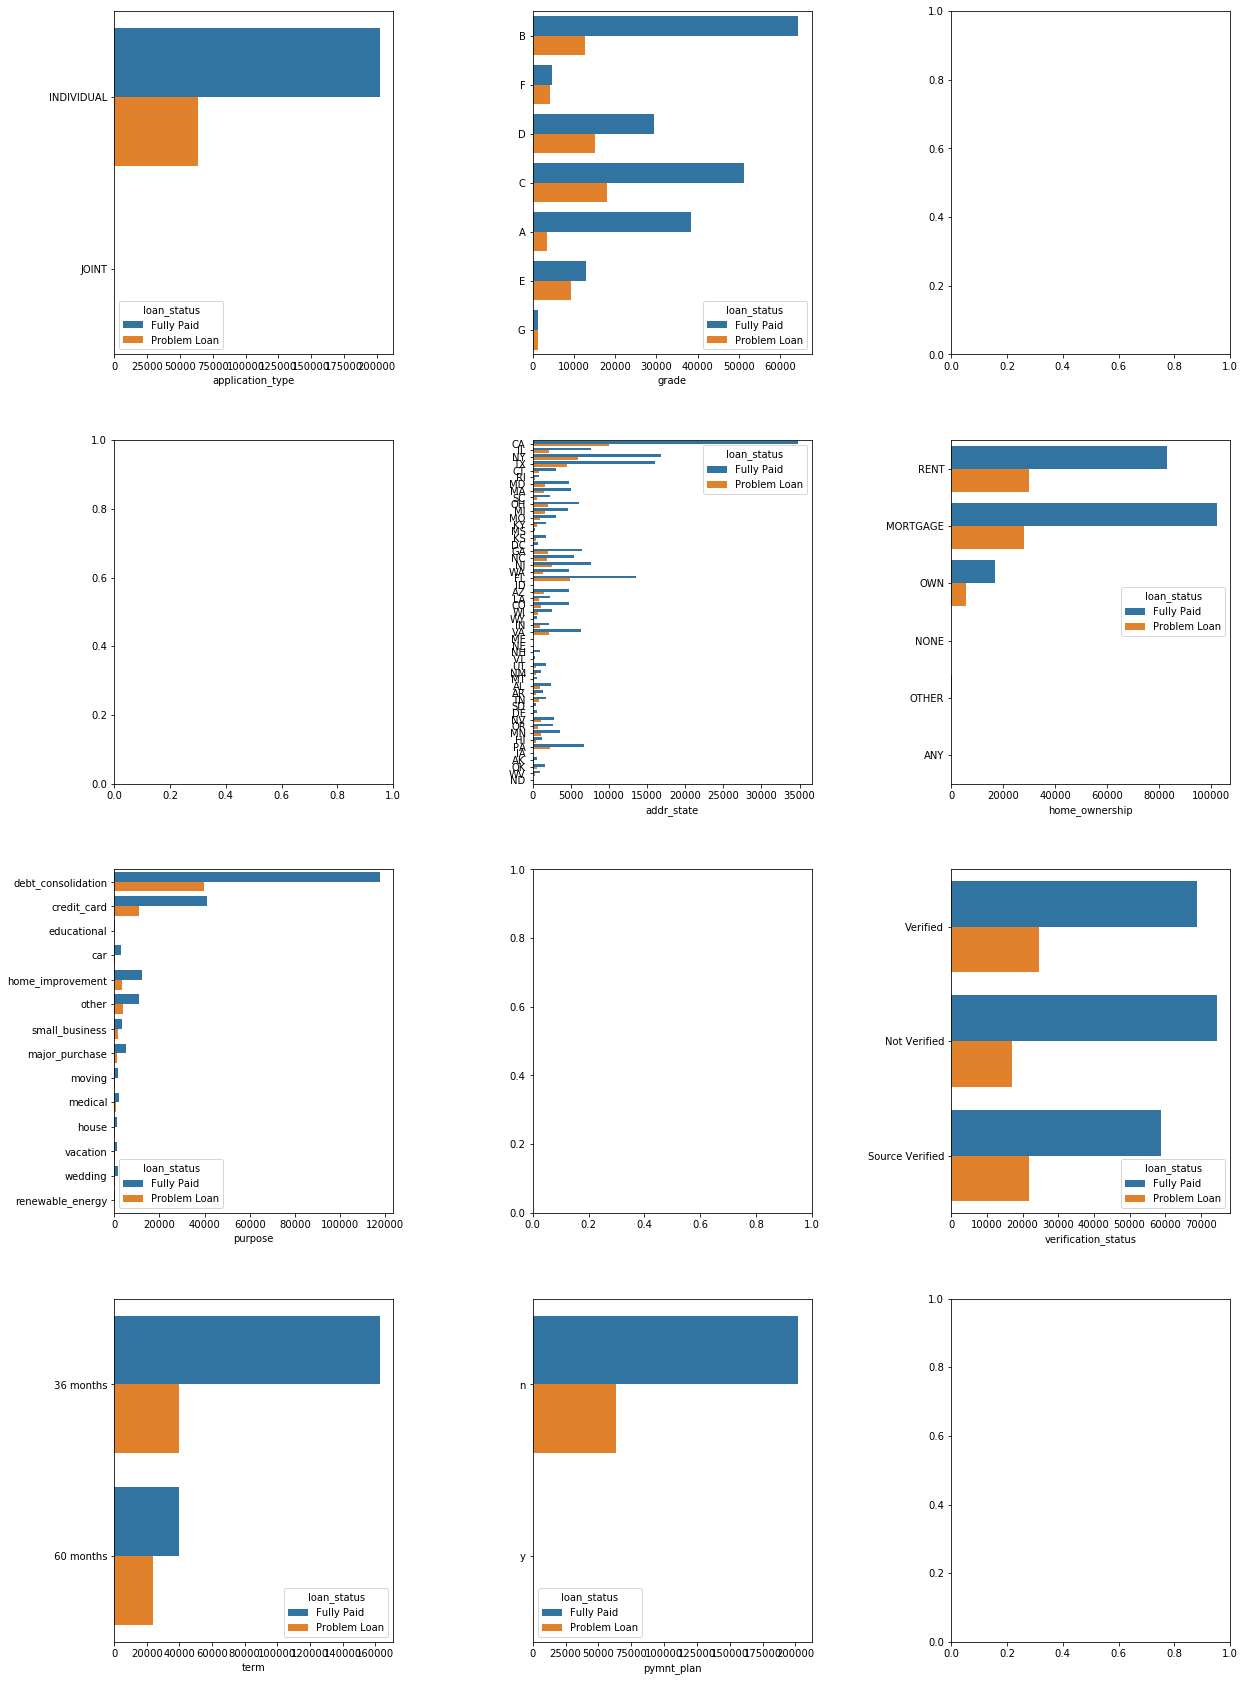

In [36]:
nn_col_list = types_of_columns(n_loan_df)[0].index.drop(['loan_status'])

row = 4
col = 3

fig, axs = pl.subplots(row,col, figsize=(20,30))
fig.subplots_adjust(wspace=0.5, hspace=0.25)

for num, name in enumerate(nn_col_list):
    #print (num, name)
    i = num%row
    j = num%col
    graph = sns.countplot(y = n_loan_df[name], hue=n_loan_df['loan_status'], ax = axs[i,j], linewidth = 1.5)
    graph.set(xlabel=name, ylabel='')

In [37]:
for col in nn_col_list:
    series = n_loan_df.groupby(col)['loan_status'].count()
    print ('\n',series)


 application_type
INDIVIDUAL    266034
JOINT              5
Name: loan_status, dtype: int64

 addr_state
AK      695
AL     3321
AR     1820
AZ     6250
CA    44813
CO     5858
CT     3910
DC      856
DE      712
FL    18354
GA     8448
HI     1575
IA       13
ID        9
IL     9745
IN     2993
KS     2155
KY     2336
LA     3130
MA     6543
MD     6423
ME       13
MI     6204
MN     4706
MO     4124
MS      513
MT      779
NC     7246
ND       12
NE       58
NH     1212
NJ    10237
NM     1434
NV     3945
NY    22718
OH     8104
OK     2271
OR     3395
PA     8989
RI     1160
SC     2910
SD      575
TN     2665
TX    20552
UT     2222
VA     8473
VT      440
WA     6109
WI     3231
WV     1166
WY      617
Name: loan_status, dtype: int64

 verification_status
Not Verified       91663
Source Verified    80743
Verified           93633
Name: loan_status, dtype: int64

 term
 36 months    202829
 60 months     63210
Name: loan_status, dtype: int64

 grade
A    41771
B    77075
C    69281

### Numeric Features

In [38]:
len(types_of_columns(n_loan_df)[1].index)

15

In [39]:
num_col_list = types_of_columns(n_loan_df)[1].index

for col in num_col_list:
    length = len(n_loan_df[col].unique())
    print (col, length)

loan_amnt 1342
revol_bal 48530
out_prncp 18444
total_pymnt 252624
total_pymnt_inv 245933
total_rec_late_fee 5338
recoveries 22109
collection_recovery_fee 19829
last_pymnt_amnt 198581
total_rec_int 191175
total_rec_prncp 59804
int_rate 535
emp_length 11
issue_d 9
annual_inc 18954


In [40]:
num_col_list = types_of_columns(n_loan_df)[1].index

cor_df = pd.DataFrame()
for i in range(0,len(num_col_list)):
    cor_df = pd.concat([cor_df, n_loan_df[num_col_list[i]]],axis=1)    

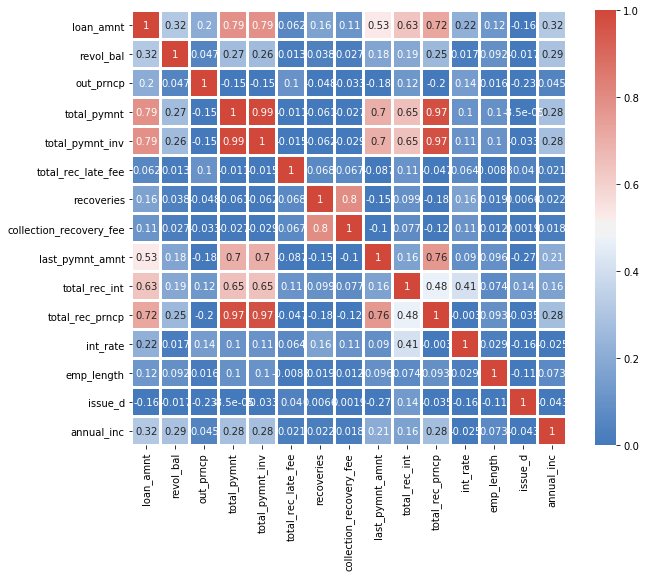

In [41]:
f, ax = pl.subplots(figsize=(10, 8))
corr = cor_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(250, 15, as_cmap=True),
            square=True, ax=ax, annot=True, vmin=0, vmax=1, linewidths=2, xticklabels=1, yticklabels=True)

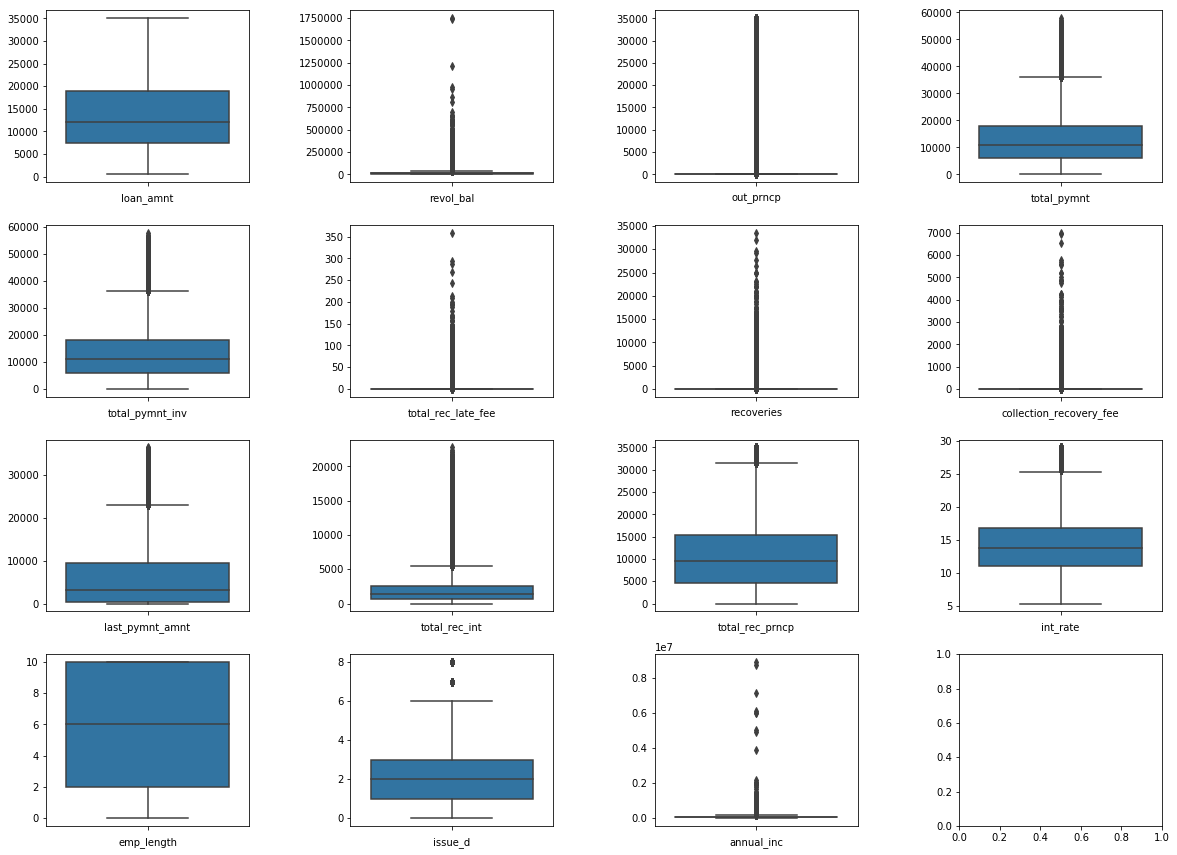

In [42]:
row1 = 4
col1 = 4

fig, axs = pl.subplots(row1,col1, figsize=(20,15))
fig.subplots_adjust(wspace=0.5, hspace=0.25)

for num, name in enumerate(num_col_list):
    i = num//row1
    j = num%col1
    graph = sns.boxplot(y = n_loan_df[name], ax = axs[i,j], linewidth = 1.5)
    graph.set(xlabel=name, ylabel='')

In [43]:
n_loan_df = n_loan_df[n_loan_df.annual_inc.isnull()==False]

Removing outgroups

In [44]:
n_loans = n_loan_df.reset_index(drop=True)
# ADAPTE FROM CUSTOMER SEGMENTATION PROJECT
outliers_all = np.array([], dtype='int64')
for column in types_of_columns(n_loans)[1].index:
    Q1 = np.percentile(n_loans[column], 25)
    Q3 = np.percentile(n_loans[column], 75)
    step = (Q3 - Q1)*2
    out_list_feat=list(n_loans[~((n_loans[column] >= Q1 - step) & (n_loans[column] <= Q3 + step))].index)
    outliers_all = np.append(outliers_all, out_list_feat)

from collections import Counter
out_count = Counter(outliers_all)
out_customer =[]
for customer, count in out_count.items():
    if count > 1:
        out_customer.append(customer.astype(int))
outliers  = list(sorted(out_customer))

print("%d outliers found in more than one feature will be remove" % len(outliers))

n_loan_no_out = n_loans.drop(n_loans.index[outliers])
    
print(n_loan_df.shape, n_loan_no_out.shape)

33385 outliers found in more than one feature will be remove
(266035, 24) (232650, 24)


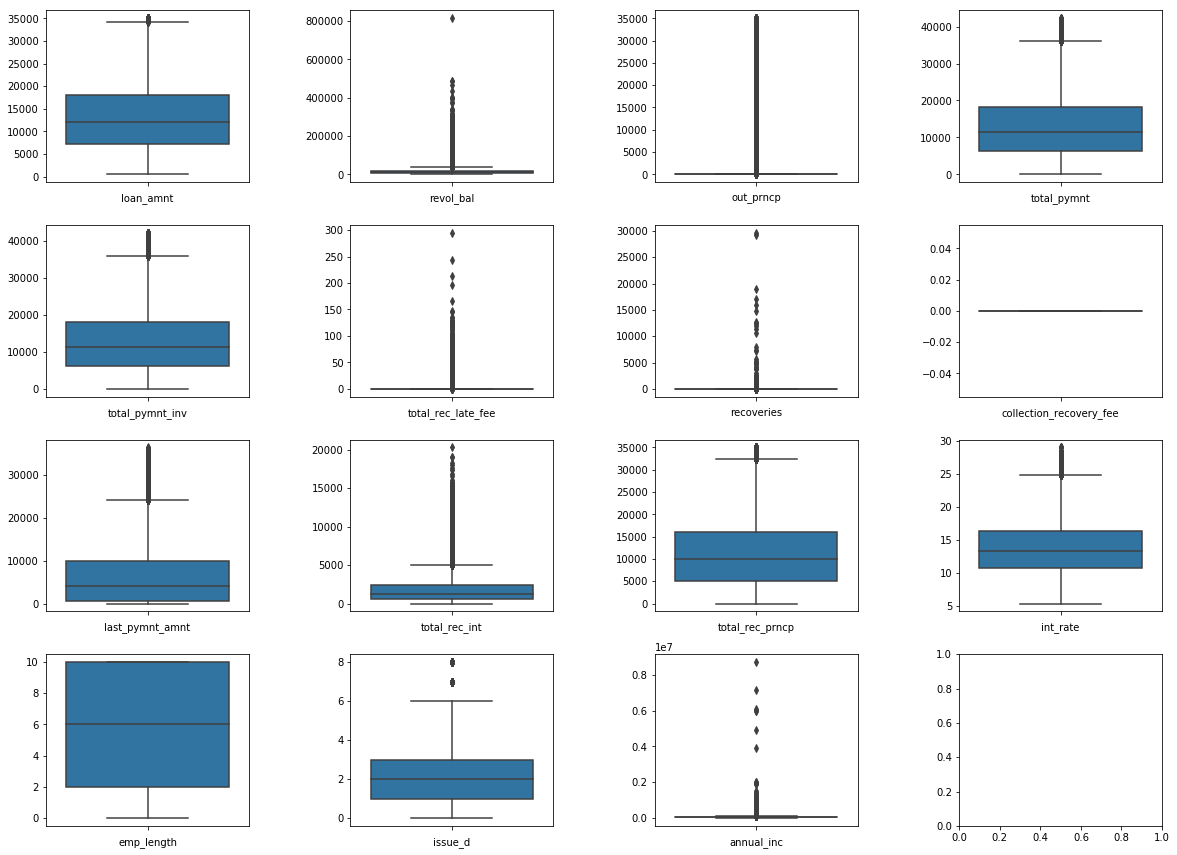

In [45]:
row1 = 4
col1 = 4

fig, axs = pl.subplots(row1,col1, figsize=(20,15))
fig.subplots_adjust(wspace=0.5, hspace=0.25)

for num, name in enumerate(num_col_list):
    i = num//row1
    j = num%col1
    graph = sns.boxplot(y = n_loan_no_out[name], ax = axs[i,j], linewidth = 1.5)
    graph.set(xlabel=name, ylabel='')

Encoding categorical columns

In [46]:
n_loan_no_out.describe()

,loan_amnt,revol_bal,out_prncp,total_pymnt,total_pymnt_inv,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,total_rec_int,total_rec_prncp,int_rate,emp_length,issue_d,annual_inc
count,232650.000000,232650.000000,232650.000000,232650.000000,232650.000000,232650.000000,232650.000000,232650.0,232650.000000,232650.000000,232650.000000,232650.00000,232650.000000,232650.000000,2.326500e+05
mean,13143.957124,14160.155212,745.059624,13168.609075,13055.630472,0.397936,1.514911,0.0,6367.716661,1798.150853,11368.545383,13.55390,5.806770,2.044444,7.068893e+04
std,7610.114282,14419.720687,3364.528120,8842.589509,8854.904457,3.814432,134.768893,0.0,7032.455246,1715.128933,7841.298550,4.29026,3.629967,1.516609,5.345573e+04
min,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,5.32000,0.000000,0.000000,1.896000e+03
25%,7200.000000,5782.000000,0.000000,6319.917015,6213.375000,0.000000,0.000000,0.0,502.822500,626.320000,5000.010000,10.64000,2.000000,1.000000,4.500000e+04
50%,12000.000000,10716.000000,0.000000,11352.635000,11249.205000,0.000000,0.000000,0.0,4089.520000,1288.510000,10000.000000,13.33000,6.000000,2.000000,6.200000e+04
75%,18000.000000,18436.750000,0.000000,18186.567500,18055.827500,0.000000,0.000000,0.0,9968.712500,2391.415000,16000.000000,16.29000,10.000000,3.000000,8.500000e+04
max,35000.000000,814300.000000,35000.000000,42252.731954,42133.210000,294.680000,29623.350000,0.0,36475.590000,20295.760000,35000.030000,28.99000,10.000000,8.000000,8.706582e+06


In [47]:
for col in (nn_col_list):
    n_loan_no_out[col]=l_encoder.fit_transform(n_loan_no_out[col])
n_loan_no_out.head()

,loan_amnt,revol_bal,out_prncp,total_pymnt,total_pymnt_inv,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,application_type,...,term,int_rate,grade,emp_length,home_ownership,purpose,issue_d,loan_status,pymnt_plan,annual_inc
0,25000.0,28854.0,0.0,29324.32,21811.70,0.0,0.0,0.0,7392.08,0,...,0,11.89,1,0.0,5,2,6,Fully Paid,0,85000.0
1,1000.0,10125.0,0.0,1207.76,0.00,0.0,0.0,0.0,538.97,0,...,0,16.08,5,0.0,5,2,7,Fully Paid,0,30000.0
2,7000.0,33623.0,0.0,8215.45,684.85,0.0,0.0,0.0,228.48,0,...,0,10.71,1,0.0,5,1,7,Fully Paid,0,65000.0
5,1200.0,2584.0,0.0,1457.31,1457.31,0.0,0.0,0.0,42.73,0,...,0,13.11,2,10.0,4,2,5,Fully Paid,0,54000.0
6,10800.0,3511.0,0.0,13195.27,13061.31,0.0,0.0,0.0,398.00,0,...,0,13.57,2,6.0,5,2,6,Fully Paid,0,32000.0


In [48]:
n_loan_no_out.loan_status = l_encoder.fit_transform(n_loan_no_out.loan_status)
n_loan_no_out.loan_status.unique()

array([0, 1])

In [49]:
print(n_loan_no_out.shape)
n_loan_no_out.head(10)

(232650, 24)


,loan_amnt,revol_bal,out_prncp,total_pymnt,total_pymnt_inv,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,application_type,...,term,int_rate,grade,emp_length,home_ownership,purpose,issue_d,loan_status,pymnt_plan,annual_inc
0,25000.0,28854.0,0.0,29324.320000,21811.70,0.0,0.0,0.0,7392.08,0,...,0,11.89,1,0.0,5,2,6,0,0,85000.0
1,1000.0,10125.0,0.0,1207.760000,0.00,0.0,0.0,0.0,538.97,0,...,0,16.08,5,0.0,5,2,7,0,0,30000.0
2,7000.0,33623.0,0.0,8215.450000,684.85,0.0,0.0,0.0,228.48,0,...,0,10.71,1,0.0,5,1,7,0,0,65000.0
5,1200.0,2584.0,0.0,1457.310000,1457.31,0.0,0.0,0.0,42.73,0,...,0,13.11,2,10.0,4,2,5,0,0,54000.0
6,10800.0,3511.0,0.0,13195.270000,13061.31,0.0,0.0,0.0,398.00,0,...,0,13.57,2,6.0,5,2,6,0,0,32000.0
7,7200.0,3874.0,0.0,9100.804663,9100.80,0.0,0.0,0.0,3559.18,0,...,0,19.05,3,9.0,5,2,3,0,0,58000.0
8,7500.0,33667.0,0.0,5843.800000,571.22,0.0,0.0,0.0,162.63,0,...,0,10.08,1,3.0,5,2,7,0,0,85000.0
9,3000.0,4740.0,0.0,3703.380000,3687.23,0.0,0.0,0.0,111.23,0,...,0,14.26,2,3.0,1,1,6,0,0,80800.0
10,4000.0,50807.0,0.0,4451.170000,4339.90,0.0,0.0,0.0,1454.31,0,...,0,7.88,0,0.0,1,1,5,0,0,148000.0
12,3200.0,3198.0,0.0,3413.920000,3413.92,0.0,0.0,0.0,2592.23,0,...,0,9.88,1,5.0,5,2,5,0,0,54000.0


### Spliting the data for the model

Spliting into features and target

In [50]:
target = n_loan_no_out.loan_status.values
features = n_loan_no_out.drop(['loan_status'], axis=1).values
print ('Loans original data %d, target: %d, features: %d' % (n_loan_no_out.shape[0], target.shape[0], features.shape[0]))

Loans original data 232650, target: 232650, features: 232650


### Building an initial model

In [51]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=pl.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    pl.imshow(cm, interpolation='nearest', cmap=cmap)
    pl.title(title)
    pl.colorbar()
    tick_marks = np.arange(len(classes))
    pl.xticks(tick_marks, classes, rotation=45)
    pl.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pl.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    pl.tight_layout()
    pl.ylabel('True label')
    pl.xlabel('Predicted label')

# USING TRAIN, VALIDATION, TEST

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_old = sc.fit_transform(features)

In [53]:
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [54]:
classifier = Sequential()
classifier.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu', input_dim = 23))
classifier.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [57]:
# Training with optimize settings
classifier.fit(X_old, target, batch_size = 30, epochs = 20)

Epoch 1/20
232650/232650 [==============================] - 32s - loss: 0.0341 - acc: 0.9906    
Epoch 2/20
232650/232650 [==============================] - 30s - loss: 0.0138 - acc: 0.9970    
Epoch 3/20
232650/232650 [==============================] - 30s - loss: 0.0123 - acc: 0.9973    
Epoch 4/20
232650/232650 [==============================] - 30s - loss: 0.0113 - acc: 0.9975    
Epoch 5/20
232650/232650 [==============================] - 30s - loss: 0.0107 - acc: 0.9976    
Epoch 6/20
232650/232650 [==============================] - 30s - loss: 0.0097 - acc: 0.9977    
Epoch 7/20
232650/232650 [==============================] - 31s - loss: 0.0093 - acc: 0.9977    
Epoch 8/20
232650/232650 [==============================] - 30s - loss: 0.0088 - acc: 0.9979    
Epoch 9/20
232650/232650 [==============================] - 30s - loss: 0.0086 - acc: 0.9980    
Epoch 10/20
232650/232650 [==============================] - 31s - loss: 0.0085 - acc: 0.9980    
Epoch 11/20
232650/232650 [==

In [58]:
# Accuracy on the validation set
loss, accuracy = classifier.evaluate(X_old, target,batch_size=128, verbose=0)
print("Accuracy = {:.4f}%, Loss = {:.4f}".format(accuracy* 100, loss))

Accuracy = 99.8594%, Loss = 0.0058


In [59]:
# Predicting on the test set 
pred_old = classifier.predict(X_old)
pred_old = (pred_old > 0.5)

In [60]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(target, pred_old, labels=[0, 1])
cnf_matrix

array([[196438,     80],
       [   247,  35885]])

Confusion matrix, without normalization


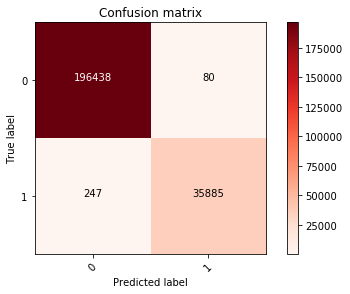

In [61]:
pl.figure()
plot_confusion_matrix(cnf_matrix, classes=n_loan_no_out.loan_status.unique(),
                      cmap=pl.cm.Reds, normalize=False)

In [62]:
from sklearn.metrics import f1_score
f1_score(target, pred_old.round(), average='binary')

0.9954644437355229